Shape: (2938, 22)
       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0  

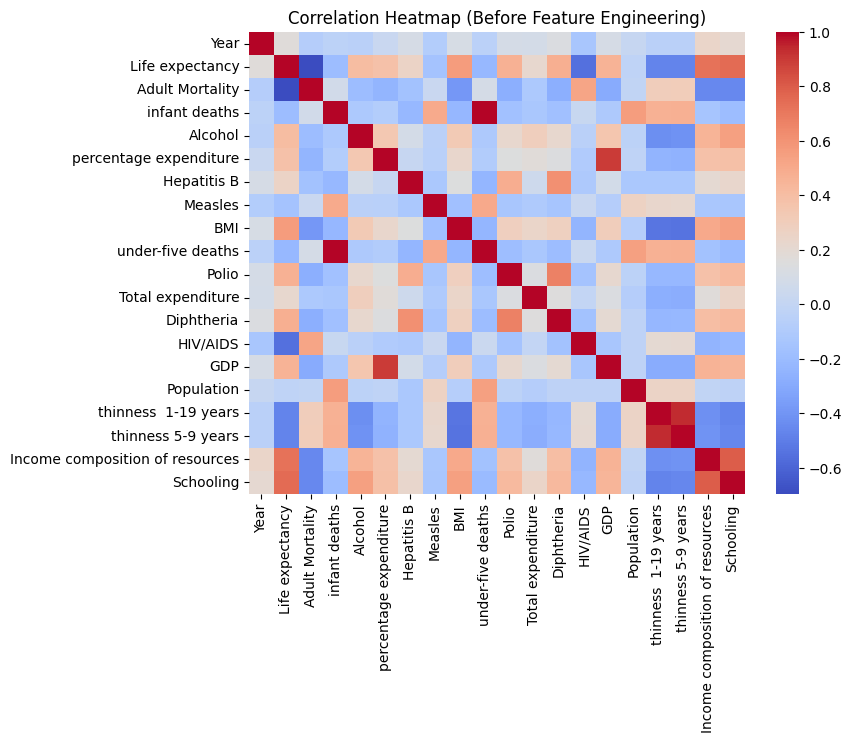

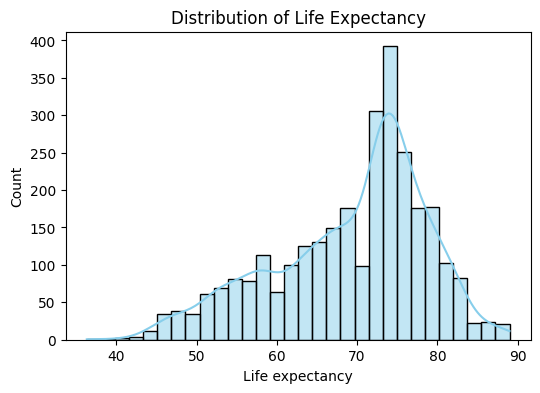

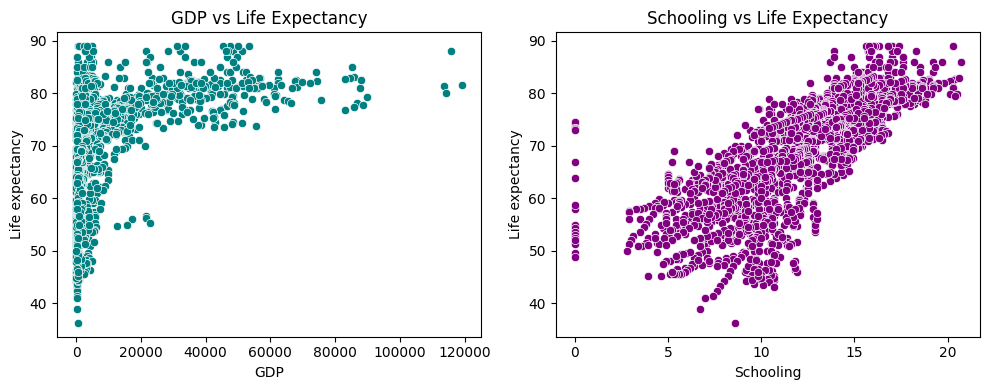

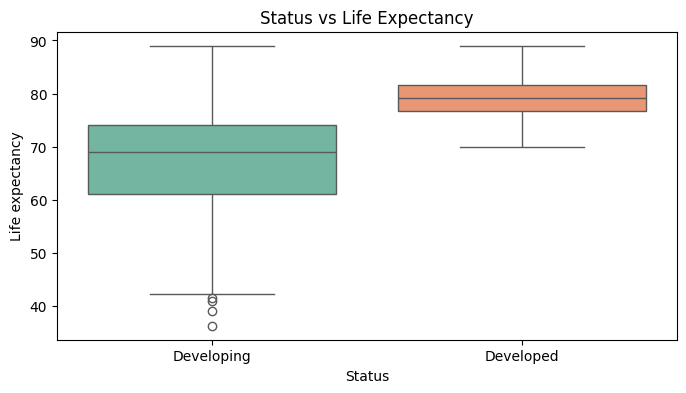


✅ Feature engineering completed. New features added:
['GDP_log', 'Schooling_Income', 'BMI_Group']

Categorical features: ['Country', 'Status', 'BMI_Group']
Numerical features: ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'GDP_log', 'Schooling_Income']


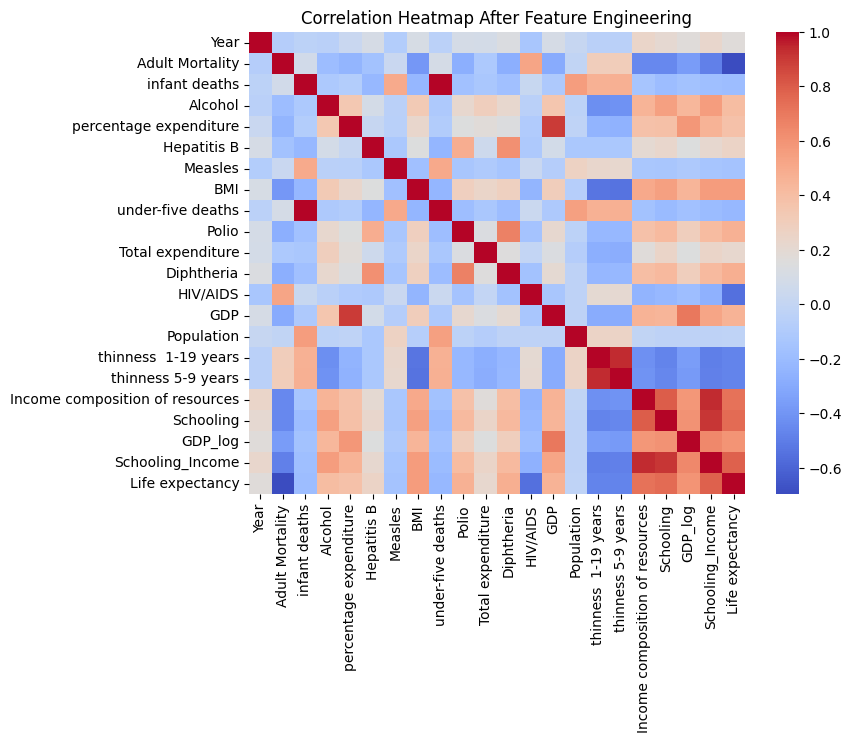

✅ EDA, feature engineering, and preprocessing complete.


In [1]:
# ==============================================
# LIFE EXPECTANCY REGRESSION - EDA & PREPROCESSING
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("Life_Expectancy.csv")
df.columns = df.columns.str.strip()  # remove trailing spaces

# Overview
print("Shape:", df.shape)
print(df.head())
print(df.info())

# =====================
# 1️⃣ Basic EDA
# =====================

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary:")
print(df.describe())

# Correlation heatmap (Before Feature Engineering)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Before Feature Engineering)")
plt.show()

# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Life expectancy'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Life Expectancy")
plt.show()

# Relationship between numeric features and target
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(x='GDP', y='Life expectancy', data=df, ax=axs[0], color='teal')
sns.scatterplot(x='Schooling', y='Life expectancy', data=df, ax=axs[1], color='purple')
axs[0].set_title('GDP vs Life Expectancy')
axs[1].set_title('Schooling vs Life Expectancy')
plt.tight_layout()
plt.show()

# Categorical feature example (only if exists)
if 'Status' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Status', y='Life expectancy', hue='Status', palette='Set2', legend=False)
    plt.title('Status vs Life Expectancy')
    plt.show()

# =====================
# ✨ Feature Engineering (New)
# =====================

# 1. Log transform GDP to reduce skewness
df['GDP_log'] = np.log1p(df['GDP'])

# 2. Interaction: Schooling × Income composition
df['Schooling_Income'] = df['Schooling'] * df['Income composition of resources']

# 3. BMI category (health groups)
df['BMI_Group'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

print("\n✅ Feature engineering completed. New features added:")
print(["GDP_log", "Schooling_Income", "BMI_Group"])

# =====================
# 2️⃣ Preprocessing
# =====================

# Define features and target
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# Identify categorical and numerical columns (updated)
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical features:", cat_features)
print("Numerical features:", num_features)

# Pipelines
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================
# 🔁 Correlation Heatmap AFTER Feature Engineering
# =====================

df_corr = df[num_features + ['Life expectancy']]

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

print("✅ EDA, feature engineering, and preprocessing complete.")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

📊 Linear Regression Results:
MAE: 1.154 | RMSE: 1.748 | R²: 0.965

📊 Feedforward NN Results:
MAE: 3.377 | RMSE: 4.556 | R²: 0.761

📊 Random Forest (Ensemble) Results:
MAE: 1.201 | RMSE: 1.728 | R²: 0.966

=== Model Comparison (Regression) ===
                      Model       MAE      RMSE        R2
0         Linear Regression  1.153844  1.747818  0.964859
1            Feedforward NN  3.377109  4.555608  0.761263
2  Random Forest (Ensemble)  1.200988  1.727693  0.965663


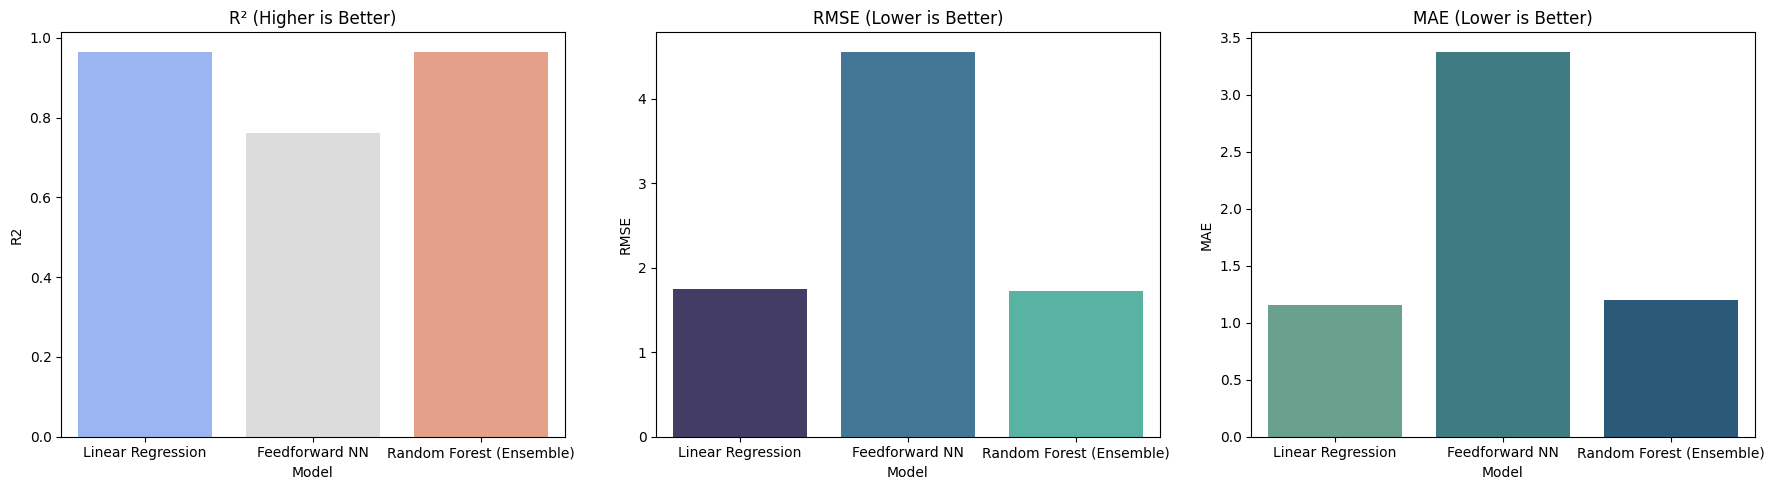

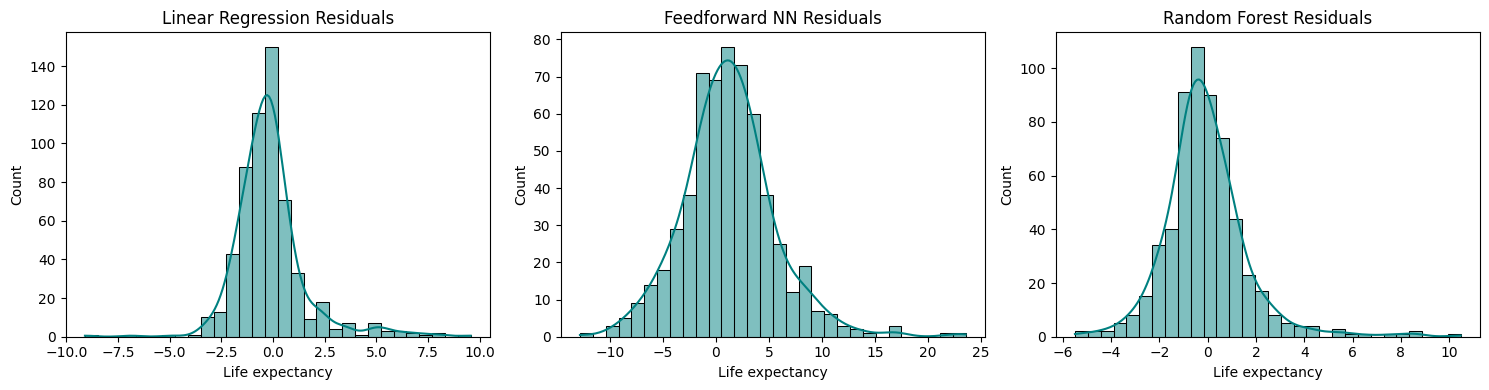

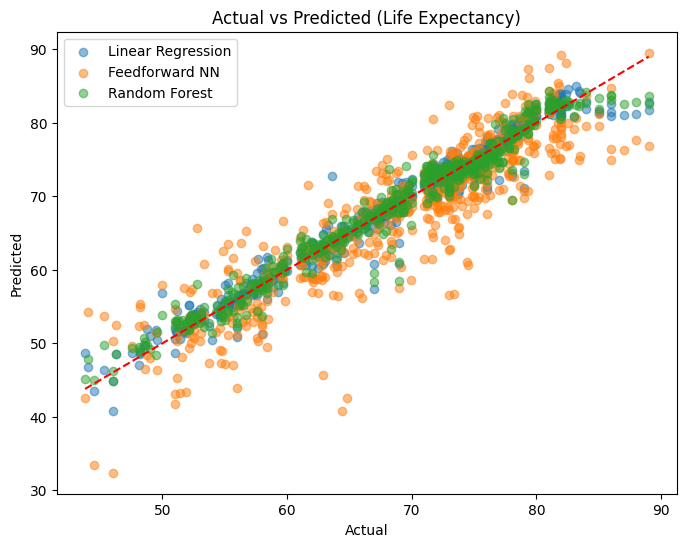

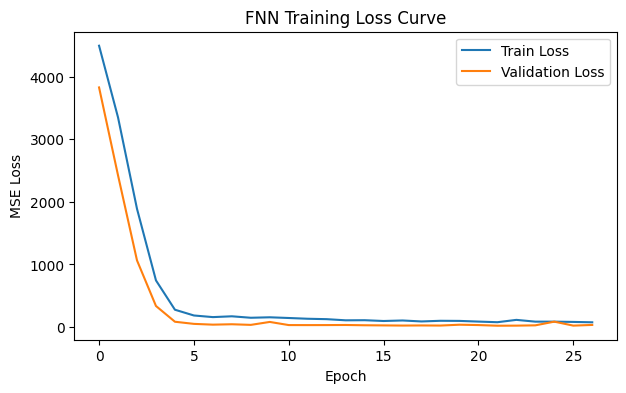


✅ Model training and evaluation complete.


In [21]:
# ==============================================
# REGRESSION MODEL TRAINING & EVALUATION
# Linear Regression | Feedforward NN | Random Forest (Ensemble)
# ==============================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1️⃣ Clean & Preprocess data
# =====================

# Remove rows where target (Life expectancy) is missing
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# Preprocess features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# =====================
# 2️⃣ Linear Regression (Traditional)
# =====================
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
y_pred_lin = lin_reg.predict(X_test_processed)

# =====================
# 3️⃣ Feedforward Neural Network (Deep Learning)
# =====================
input_dim = X_train_processed.shape[1]
model_fnn = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])
model_fnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_fnn.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)
y_pred_fnn = model_fnn.predict(X_test_processed).ravel()

# =====================
# 4️⃣ Random Forest (Ensemble)
# =====================
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_reg.fit(X_train_processed, y_train)
y_pred_rf = rf_reg.predict(X_test_processed)

# =====================
# 5️⃣ Evaluation Function
# =====================
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]

results_reg = []
results_reg.append(evaluate_regression("Linear Regression", y_test, y_pred_lin))
results_reg.append(evaluate_regression("Feedforward NN", y_test, y_pred_fnn))
results_reg.append(evaluate_regression("Random Forest (Ensemble)", y_test, y_pred_rf))

results_reg_df = pd.DataFrame(results_reg, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Model Comparison (Regression) ===")
print(results_reg_df)

# =====================
# 6️⃣ Visualization (Updated for Seaborn 0.14+ compatibility)
# =====================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", hue="Model", data=results_reg_df, palette="coolwarm", legend=False, ax=axes[0])
sns.barplot(x="Model", y="RMSE", hue="Model", data=results_reg_df, palette="mako", legend=False, ax=axes[1])
sns.barplot(x="Model", y="MAE", hue="Model", data=results_reg_df, palette="crest", legend=False, ax=axes[2])

axes[0].set_title("R² (Higher is Better)")
axes[1].set_title("RMSE (Lower is Better)")
axes[2].set_title("MAE (Lower is Better)")

plt.tight_layout()
plt.show()

# Residuals
models_pred = {"Linear Regression": y_pred_lin,
               "Feedforward NN": y_pred_fnn,
               "Random Forest": y_pred_rf}

plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate(models_pred.items(), 1):
    plt.subplot(1, 3, i)
    sns.histplot(y_test - preds, bins=30, kde=True, color='teal')
    plt.title(f"{name} Residuals")
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
for name, preds in models_pred.items():
    plt.scatter(y_test, preds, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Life Expectancy)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# 📉 4️⃣ FNN Training Curve
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('FNN Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

print("\n✅ Model training and evaluation complete.")

Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Best Random Forest Parameters: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}

🔍 Training FNN with params: {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50}
R² Score: 0.8125

🔍 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}
R² Score: 0.8299

🔍 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
R² Score: 0.9063

✅ Best FNN Parameters: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

📊 Feedforward NN (Tuned) Results:
MAE: 2.076 | RMSE: 2.854 | R²: 0.906

📊 Random Forest (Tuned) Results:
MAE: 1.142 | RMSE: 1.677 | R²: 0.968

=== Tuned Model Comparison (Regression) ===
                    Model       MAE      RMSE        R2
0  Feedforward NN (Tuned)  2.076469  2.854343  0.906279
1   Random Forest (Tuned)  1.141591  1.676862  0.967654


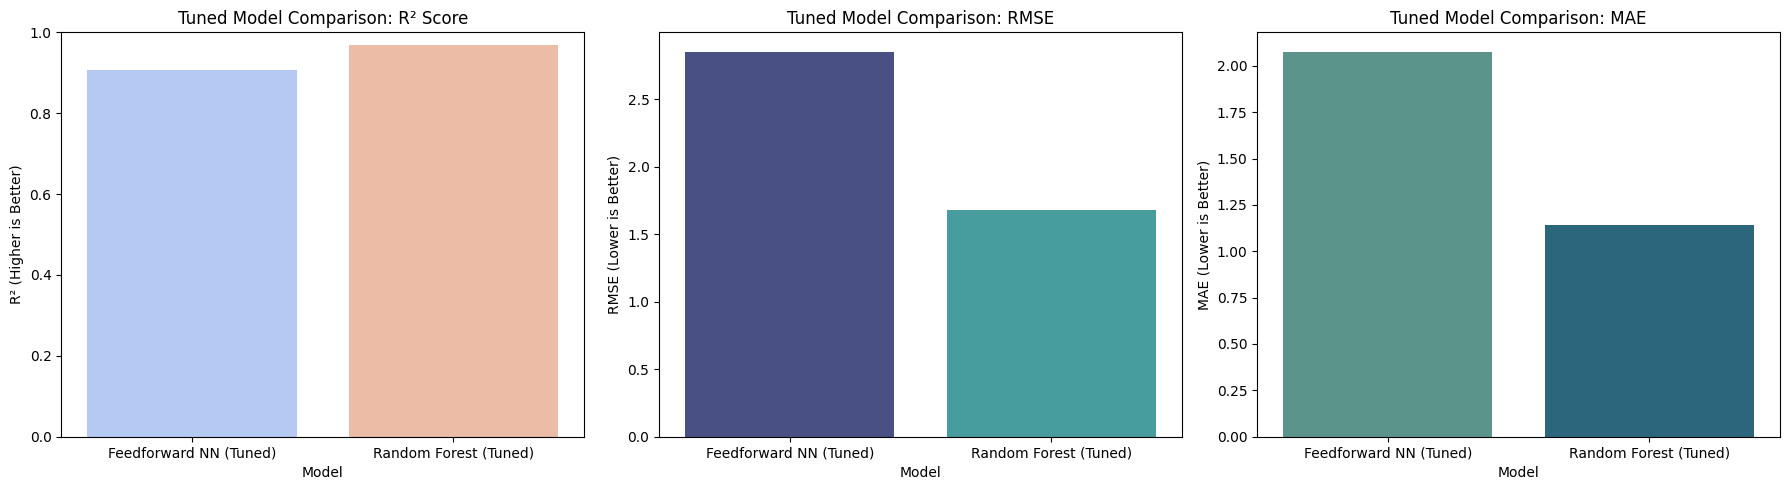


✅ Regression model tuning and comparison completed successfully.


In [20]:
# ==============================================
# MODEL TUNING (Regression)
# Random Forest | Feedforward Neural Network
# ==============================================

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K

# ======================================================
# 1️⃣ Random Forest Regressor Tuning (GridSearchCV)
# ======================================================
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train_processed, y_train)

best_rf = grid_rf.best_estimator_
print("\n✅ Best Random Forest Parameters:", grid_rf.best_params_)

y_pred_rf_tuned = best_rf.predict(X_test_processed)


# ======================================================
# 2️⃣ Feedforward Neural Network Tuning (Manual Search)
# ======================================================
fnn_param_grid = [
    {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
]

best_r2 = -np.inf
best_params_fnn = None

for params in fnn_param_grid:
    print(f"\n🔍 Training FNN with params: {params}")
    K.clear_session()

    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),
        Dense(params['neurons1'], activation='relu'),
        Dropout(0.3),
        Dense(params['neurons2'], activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=params['lr']),
                  loss='mse',
                  metrics=['mae'])

    model.fit(X_train_processed, y_train,
              validation_split=0.2,
              epochs=params['epochs'],
              batch_size=32,
              verbose=0)

    y_pred = model.predict(X_test_processed, verbose=0).ravel()
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_params_fnn = params
        best_model_fnn = model

print("\n✅ Best FNN Parameters:", best_params_fnn)
y_pred_fnn_tuned = best_model_fnn.predict(X_test_processed).ravel()


# ======================================================
# 3️⃣ Evaluate Tuned Models
# ======================================================
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]

results_tuned = []
results_tuned.append(evaluate_regression("Feedforward NN (Tuned)", y_test, y_pred_fnn_tuned))
results_tuned.append(evaluate_regression("Random Forest (Tuned)", y_test, y_pred_rf_tuned))

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Tuned Model Comparison (Regression) ===")
print(results_tuned_df)


# ======================================================
# 4️⃣ Visualization: Tuned Model Comparison
# ======================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", data=results_tuned_df, hue="Model", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Tuned Model Comparison: R² Score")
axes[0].set_ylabel("R² (Higher is Better)")
axes[0].set_ylim(0, 1)

sns.barplot(x="Model", y="RMSE", data=results_tuned_df, hue="Model", palette="mako", legend=False, ax=axes[1])
axes[1].set_title("Tuned Model Comparison: RMSE")
axes[1].set_ylabel("RMSE (Lower is Better)")

sns.barplot(x="Model", y="MAE", data=results_tuned_df, hue="Model", palette="crest", legend=False, ax=axes[2])
axes[2].set_title("Tuned Model Comparison: MAE")
axes[2].set_ylabel("MAE (Lower is Better)")

plt.tight_layout()
plt.show()

print("\n✅ Regression model tuning and comparison completed successfully.")

Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Best Random Forest Parameters: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}

🔍 Training FNN with params: {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 50}
R² Score: 0.7775

🔍 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.001, 'epochs': 80}
R² Score: -0.1536

🔍 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}
R² Score: 0.8544

✅ Best FNN Parameters: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100}

📊 Linear Regression (Baseline) Results:
MAE: 1.154 | RMSE: 1.748 | R²: 0.965

📊 Feedforward NN (Tuned) Results:
MAE: 2.675 | RMSE: 3.558 | R²: 0.854

📊 Random Forest (Tuned) Results:
MAE: 1.142 | RMSE: 1.677 | R²: 0.968

=== Tuned Model Comparison (Regression) ===
                          Model       MAE      RMSE        R2
0  Linear Regression (Baseline)  1.153844  1.747818  0.964859
1        Feedforward NN (Tuned)  2.674890 

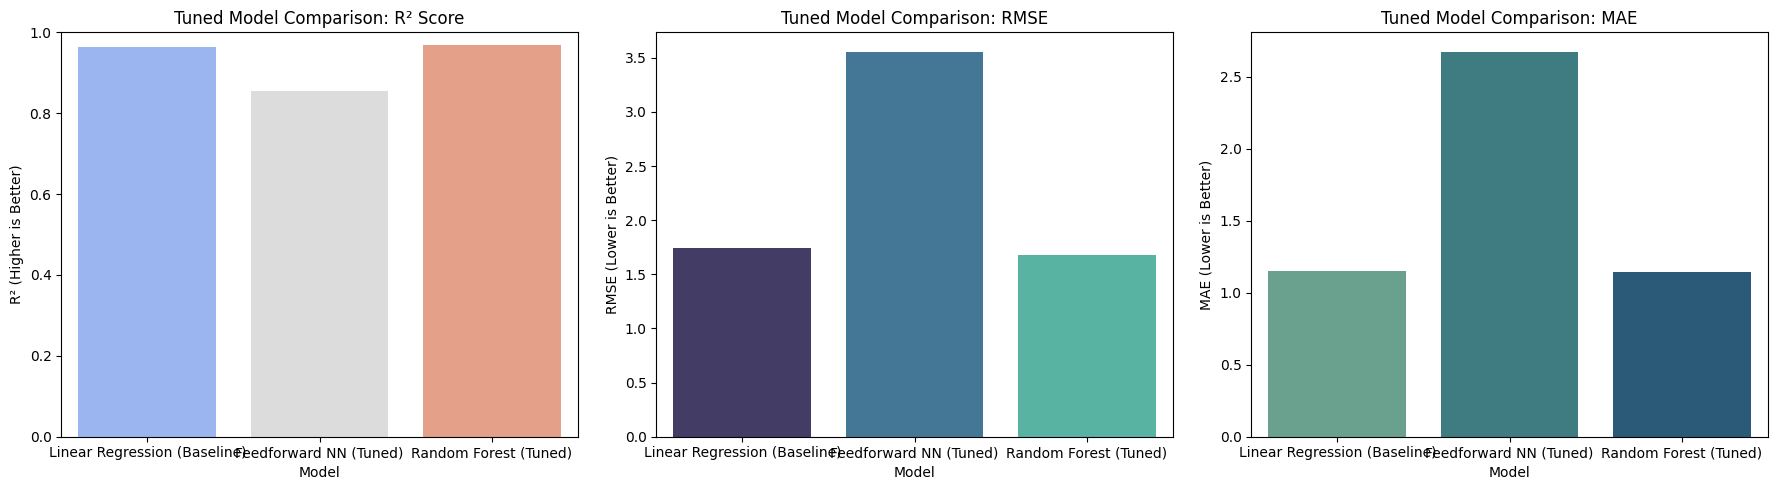

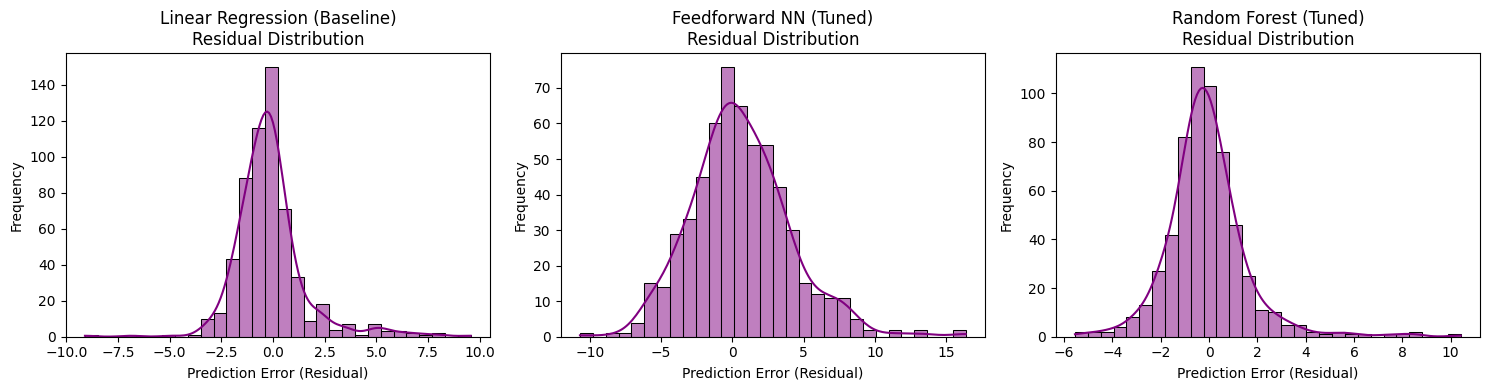

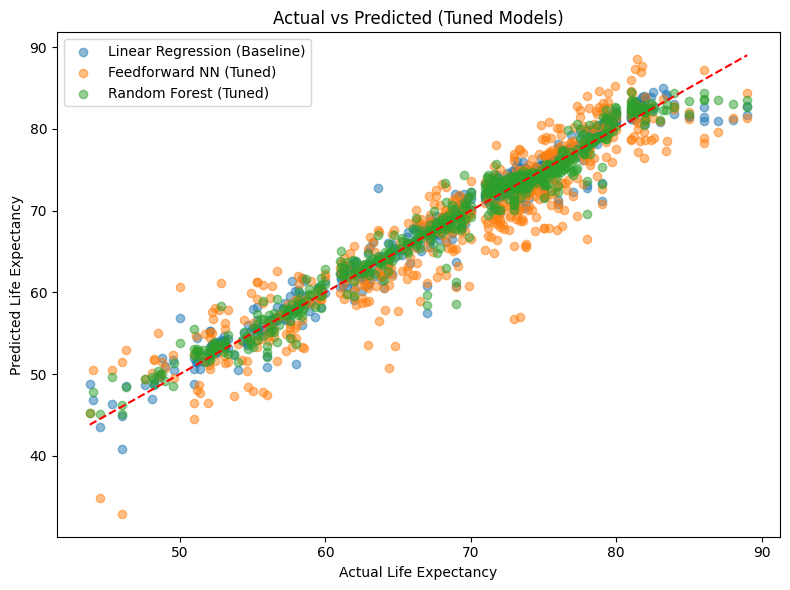


✅ Regression tuning (Linear, FNN, Random Forest) completed successfully.


In [19]:
# ==============================================
# MODEL TUNING (Regression)
# Linear Regression | Feedforward NN | Random Forest
# ==============================================

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ------------------------------------------------------
# 0️⃣ Helper function for consistent evaluation
# ------------------------------------------------------
def evaluate_regression(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [name, mae, rmse, r2]


# ======================================================
# 1️⃣ Random Forest Regressor Tuning (GridSearchCV)
# ======================================================
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train_processed, y_train)

best_rf = grid_rf.best_estimator_
print("\n✅ Best Random Forest Parameters:", grid_rf.best_params_)

y_pred_rf_tuned = best_rf.predict(X_test_processed)


# ======================================================
# 2️⃣ Feedforward Neural Network Tuning (Manual Search)
# ======================================================
fnn_param_grid = [
    {'neurons1': 64,  'neurons2': 32, 'lr': 0.001,  'epochs': 50},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.001,  'epochs': 80},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 100},
]

best_r2 = -np.inf
best_params_fnn = None

for params in fnn_param_grid:
    print(f"\n🔍 Training FNN with params: {params}")
    K.clear_session()

    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),
        Dense(params['neurons1'], activation='relu'),
        Dropout(0.3),
        Dense(params['neurons2'], activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=params['lr']), loss='mse', metrics=['mae'])

    model.fit(
        X_train_processed, y_train,
        validation_split=0.2,
        epochs=params['epochs'],
        batch_size=32,
        verbose=0
    )

    y_pred = model.predict(X_test_processed, verbose=0).ravel()
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_params_fnn = params
        best_model_fnn = model

print("\n✅ Best FNN Parameters:", best_params_fnn)
y_pred_fnn_tuned = best_model_fnn.predict(X_test_processed, verbose=0).ravel()


# ======================================================
# 3️⃣ Linear Regression (Baseline)
# ======================================================
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
y_pred_lin = lin_reg.predict(X_test_processed)


# ======================================================
# 4️⃣ Combine Results
# ======================================================
results_tuned = []
results_tuned.append(evaluate_regression("Linear Regression (Baseline)", y_test, y_pred_lin))
results_tuned.append(evaluate_regression("Feedforward NN (Tuned)", y_test, y_pred_fnn_tuned))
results_tuned.append(evaluate_regression("Random Forest (Tuned)", y_test, y_pred_rf_tuned))

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Tuned Model Comparison (Regression) ===")
print(results_tuned_df)


# ======================================================
# 5️⃣ Visualization: Tuned Model Comparison
# ======================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Model", y="R2", data=results_tuned_df, hue="Model", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Tuned Model Comparison: R² Score")
axes[0].set_ylabel("R² (Higher is Better)")
axes[0].set_ylim(0, 1)

sns.barplot(x="Model", y="RMSE", data=results_tuned_df, hue="Model", palette="mako", legend=False, ax=axes[1])
axes[1].set_title("Tuned Model Comparison: RMSE")
axes[1].set_ylabel("RMSE (Lower is Better)")

sns.barplot(x="Model", y="MAE", data=results_tuned_df, hue="Model", palette="crest", legend=False, ax=axes[2])
axes[2].set_title("Tuned Model Comparison: MAE")
axes[2].set_ylabel("MAE (Lower is Better)")

plt.tight_layout()
plt.show()


# ======================================================
# 6️⃣ Residual Distribution & Actual vs Predicted
# ======================================================
tuned_preds = {
    "Linear Regression (Baseline)": y_pred_lin,
    "Feedforward NN (Tuned)": y_pred_fnn_tuned,
    "Random Forest (Tuned)": y_pred_rf_tuned
}

# Residuals
plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate(tuned_preds.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - preds
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'{name}\nResidual Distribution')
    plt.xlabel('Prediction Error (Residual)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
for name, preds in tuned_preds.items():
    plt.scatter(y_test, preds, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Tuned Models)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.tight_layout()
plt.show()

print("\n✅ Regression tuning (Linear, FNN, Random Forest) completed successfully.")
